In [ ]:
import pandas as pd
import seaborn as sb
import numpy as np

In [ ]:
from google.colab import drive
drive.mount("/content/drive") 

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Twitter-Dataset-Analysis/295B/Nov22/RealNews_Influencers_Nov22.csv')
df

,user_id,followers_count,following_count,status_count,created_at,favorites_count,verified,active_years,status_follower_ratio,followers_following_ratio
0,833964896404508672,880,311,1167,Tue Feb 21 09:01:40 +0000 2017,1343,False,3,1.326136,2.829582
1,14111628,3981,4994,82894,Mon Mar 10 05:08:33 +0000 2008,903,False,12,20.822406,0.797157
2,205971568,2359,2271,142464,Fri Oct 22 00:41:36 +0000 2010,3044,False,10,60.391691,1.038749
3,128762218,1126,1880,11517,Fri Apr 02 03:41:26 +0000 2010,181,False,10,10.228242,0.598936
4,44385059,835,3697,26127,Wed Jun 03 15:46:54 +0000 2009,8209,False,11,31.289820,0.225859
...,...,...,...,...,...,...,...,...,...,...
37201,19812221,3445,2012,20082,Sat Jan 31 11:32:34 +0000 2009,8453,False,11,5.829318,1.712227
37202,539699081,6155,3944,278825,Thu Mar 29 05:48:00 +0000 2012,261841,False,8,45.300569,1.560598
37203,710555609771298817,1095,130,14772,Thu Mar 17 19:57:13 +0000 2016,7468,False,4,13.490411,8.423077
37204,254165243,1384,341,5620,Fri Feb 18 18:55:49 +0000 2011,1570,False,9,4.060694,4.058651


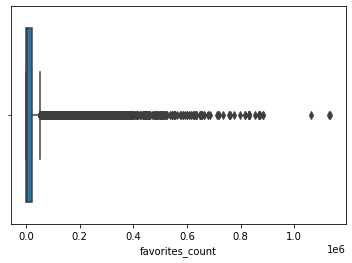

In [ ]:
ax = sb.boxplot(x=df["favorites_count"])

### Favorites Count

In [ ]:
np.max(df['favorites_count'])

1134098

In [ ]:
np.min(df['favorites_count'])

0

In [ ]:
np.mean(df['favorites_count'])

26183.09382895232

In [ ]:
np.median(df['favorites_count'])

2897.0

In [ ]:
from scipy.stats import mode
mode(df['favorites_count'])[0][0]

0

In [ ]:
print("Q2 quantile of arr : ", np.quantile(df['favorites_count'], .50)) 
print("Q1 quantile of arr : ", np.quantile(df['favorites_count'], .25)) 
print("Q3 quantile of arr : ", np.quantile(df['favorites_count'], .75)) 

Q2 quantile of arr :  2897.0
Q1 quantile of arr :  155.0
Q3 quantile of arr :  21135.75


### Active Years

In [ ]:
np.max(df['active_years'])

14

In [ ]:
np.min(df['active_years'])

2

In [ ]:
np.mean(df['active_years'])

7.9238832446379615

In [ ]:
np.median(df['active_years'])

9.0

In [ ]:
mode(df['active_years'])[0][0]

11

In [ ]:
print("Q2 quantile of arr : ", np.quantile(df['active_years'], .50)) 
print("Q1 quantile of arr : ", np.quantile(df['active_years'], .25)) 
print("Q3 quantile of arr : ", np.quantile(df['active_years'], .75)) 

Q2 quantile of arr :  9.0
Q1 quantile of arr :  5.0
Q3 quantile of arr :  11.0


### followers_following_ratio

In [ ]:
np.max(df['followers_following_ratio'])

15105707.333333336

In [ ]:
np.min(df['followers_following_ratio'])

0.0

In [ ]:
np.mean(df['followers_following_ratio'])

1729.4962740653714

In [ ]:
np.median(df['followers_following_ratio'])

0.9235872837487011

In [ ]:
mode(df['followers_following_ratio'])[0][0]

0.0

In [ ]:
print("Q2 quantile of arr : ", np.quantile(df['followers_following_ratio'], .50)) 
print("Q1 quantile of arr : ", np.quantile(df['followers_following_ratio'], .25)) 
print("Q3 quantile of arr : ", np.quantile(df['followers_following_ratio'], .75)) 

Q2 quantile of arr :  0.9235872837487011
Q1 quantile of arr :  0.42167614621701044
Q3 quantile of arr :  2.042284264268549


### status_follower_ratio

In [ ]:
np.max(df['status_follower_ratio'])

72079.5

In [ ]:
np.min(df['status_follower_ratio'])

0.0

In [ ]:
np.mean(df['status_follower_ratio'])

146.95594462468281

In [ ]:
np.median(df['status_follower_ratio'])

22.89527306985422

In [ ]:
mode(df['status_follower_ratio'])[0][0]

0.0

In [ ]:
print("Q2 quantile of arr : ", np.quantile(df['status_follower_ratio'], .50)) 
print("Q1 quantile of arr : ", np.quantile(df['status_follower_ratio'], .25)) 
print("Q3 quantile of arr : ", np.quantile(df['status_follower_ratio'], .75)) 

Q2 quantile of arr :  22.89527306985422
Q1 quantile of arr :  5.197102207343865
Q3 quantile of arr :  76.31447154471545


### Calculating final score/weights

In [ ]:
def verified_score(df):
    if(df['verified'] == True):
        df['verified_score'] = 0.30
    else:
        df['verified_score'] = 0.00
    
    if(df['active_years'] >= 0 and df['active_years'] <= 5.0):
        df['active_year_score'] = 0.05
    elif(df['active_years'] > 5.0 and df['active_years'] <= 9.0):
        df['active_year_score'] = 0.1
    elif(df['active_years'] > 9.0 and df['active_years'] <= 11.0):
        df['active_year_score'] = 0.15
    else:
        df['active_year_score'] = 0.2
        
    if(df['followers_following_ratio'] >= 0 and df['followers_following_ratio'] <= 0.42167614621701044):
        df['ff_score'] = 0.05
    elif(df['followers_following_ratio'] > 0.42167614621701044 and df['followers_following_ratio'] <= 0.9235872837487011):
        df['ff_score'] = 0.1
    elif(df['followers_following_ratio'] > 0.9235872837487011 and df['followers_following_ratio'] <= 2.042284264268549):
        df['ff_score'] = 0.15
    else:
        df['ff_score'] = 0.2
        
    if(df['favorites_count'] >= 0 and df['favorites_count'] <= 155.0):
        df['favorites_count_score'] = 0.025
    elif(df['favorites_count'] > 155.0 and df['favorites_count'] <= 2897.0):
        df['favorites_count_score'] = 0.05
    elif(df['favorites_count'] > 2897.0 and df['favorites_count'] <= 21135.75):
        df['favorites_count_score'] = 0.075
    else:
        df['favorites_count_score'] = 0.1
        
    if(df['status_follower_ratio'] >= 0 and df['status_follower_ratio'] <= 5.197102207343865):
        df['sf_score'] = 0.05
    elif(df['status_follower_ratio'] > 5.197102207343865 and df['status_follower_ratio'] <= 22.89527306985422):
        df['sf_score'] = 0.1
    elif(df['status_follower_ratio'] > 22.89527306985422 and df['status_follower_ratio'] <= 76.31447154471545):
        df['sf_score'] = 0.15
    else:
        df['sf_score'] = 0.2
        
    df['weights'] = df['verified_score'] + df['active_year_score'] + df['ff_score'] +  df['favorites_count_score'] + df['sf_score']
    return df

In [ ]:
df_final = df.apply(verified_score,axis=1)
df_final

,user_id,followers_count,following_count,status_count,created_at,favorites_count,verified,active_years,status_follower_ratio,followers_following_ratio,verified_score,active_year_score,ff_score,favorites_count_score,sf_score,weights
0,833964896404508672,880,311,1167,Tue Feb 21 09:01:40 +0000 2017,1343,False,3,1.326136,2.829582,0.0,0.05,0.20,0.10,0.05,0.40
1,14111628,3981,4994,82894,Mon Mar 10 05:08:33 +0000 2008,903,False,12,20.822406,0.797157,0.0,0.20,0.10,0.10,0.10,0.50
2,205971568,2359,2271,142464,Fri Oct 22 00:41:36 +0000 2010,3044,False,10,60.391691,1.038749,0.0,0.15,0.15,0.15,0.15,0.60
3,128762218,1126,1880,11517,Fri Apr 02 03:41:26 +0000 2010,181,False,10,10.228242,0.598936,0.0,0.15,0.10,0.10,0.10,0.45
4,44385059,835,3697,26127,Wed Jun 03 15:46:54 +0000 2009,8209,False,11,31.289820,0.225859,0.0,0.15,0.05,0.15,0.15,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37201,19812221,3445,2012,20082,Sat Jan 31 11:32:34 +0000 2009,8453,False,11,5.829318,1.712227,0.0,0.15,0.15,0.15,0.10,0.55
37202,539699081,6155,3944,278825,Thu Mar 29 05:48:00 +0000 2012,261841,False,8,45.300569,1.560598,0.0,0.10,0.15,0.20,0.15,0.60
37203,710555609771298817,1095,130,14772,Thu Mar 17 19:57:13 +0000 2016,7468,False,4,13.490411,8.423077,0.0,0.05,0.20,0.15,0.10,0.50
37204,254165243,1384,341,5620,Fri Feb 18 18:55:49 +0000 2011,1570,False,9,4.060694,4.058651,0.0,0.10,0.20,0.10,0.05,0.45


In [ ]:
df_final.to_csv('/content/drive/MyDrive/Twitter-Dataset-Analysis/295B/Nov22/RealNews_Weights_Nov22.csv',index=False)

In [ ]:
df_final.columns

In [ ]:
df_final = df_final.drop(['followers_count', 'following_count', 'status_count',
       'created_at', 'favorites_count', 'verified', 'active_years',
       'status_follower_ratio', 'followers_following_ratio', 'verified_score',
       'active_year_score', 'ff_score', 'favorites_count_score', 'sf_score'],axis=1)

In [ ]:
df_final

,user_id,weights
0,833964896404508672,0.40
1,14111628,0.50
2,205971568,0.60
3,128762218,0.45
4,44385059,0.50
...,...,...
37201,19812221,0.55
37202,539699081,0.60
37203,710555609771298817,0.50
37204,254165243,0.45


In [ ]:
df_final.to_csv('/content/drive/MyDrive/Twitter-Dataset-Analysis/295B/Nov22/RealNews_final_weights_Nov22.csv',index=False)